# ICS 434: DATA SCIENCE FUNDAMENTALS

## Linear Regression

---

In [4]:
# !pip install statsmodels

In [5]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as sm

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as skl_lm
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score

### Single Linear Regression

-  Also known as simple linear regression

- A simple method to predict a *quantitative* response $Y$ on the basis of a single predictor variable $X$

- Assume an approximately linear relationship between $X$ and $Y$

- Remember that the equation of a line is:

$$
    Y = \beta_o + \beta_1X
$$




### Example: Advertising Data

- Displays sales (in thousands of units) for some product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper.
* Which medium, or combination of media, contribute to sales?
* How accurately can we estimate the effect of each medium on sales?
* Is there synergy between the advertising media?
* Etc.


In [7]:
advertising = pd.read_csv('data/Advertising.csv', usecols=[1, 2, 3, 4])
advertising.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [8]:
from scipy.stats import linregress

linreg = linregress(advertising["TV"], advertising["sales"])
linreg

LinregressResult(slope=0.0475366404330197, intercept=7.032593549127702, rvalue=0.7822244248616063, pvalue=1.4673897001948012e-42, stderr=0.0026906071877968703, intercept_stderr=0.4578429402734785)

### Linear Regression

* `linregress` returns the intercept $\beta_0$ and the slope $\beta_1$ of the linear relationship between sales and advertising budget for TV

$$
    sales \approx \beta_o + \beta_1 \times \text{TV}
$$

* Together, $\beta_0$ and $\beta_1$ are known as the model parameters


In [9]:
some_tv_advertising = 250
some_sales_prediction = linreg.intercept + linreg.slope * some_tv_advertising

print(some_sales_prediction)

18.91675365738263


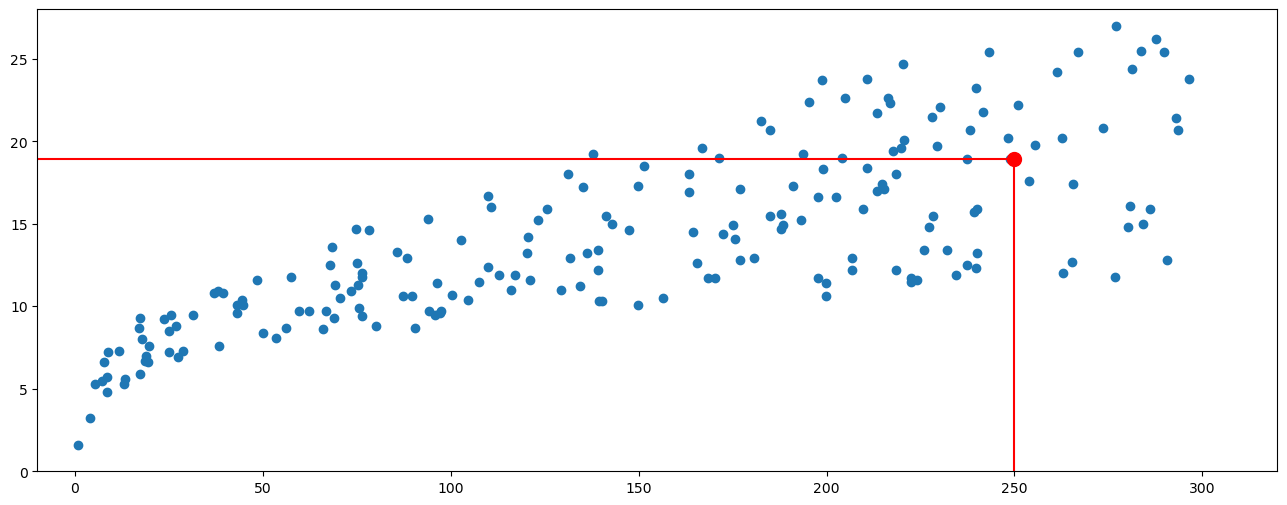

In [7]:
plt.figure(figsize=(16, 6))

some_tv_advertising = 250
some_sales_prediction = linreg.intercept + linreg.slope * some_tv_advertising

plt.scatter(advertising["TV"], advertising["sales"])
plt.xlim(-10, 320)
plt.ylim(0, 28)
plt.vlines(some_tv_advertising, 0, some_sales_prediction, color='red')
plt.hlines(some_sales_prediction, -10, some_tv_advertising, color='red')
plt.scatter(some_tv_advertising, some_sales_prediction, s=100, color='red');

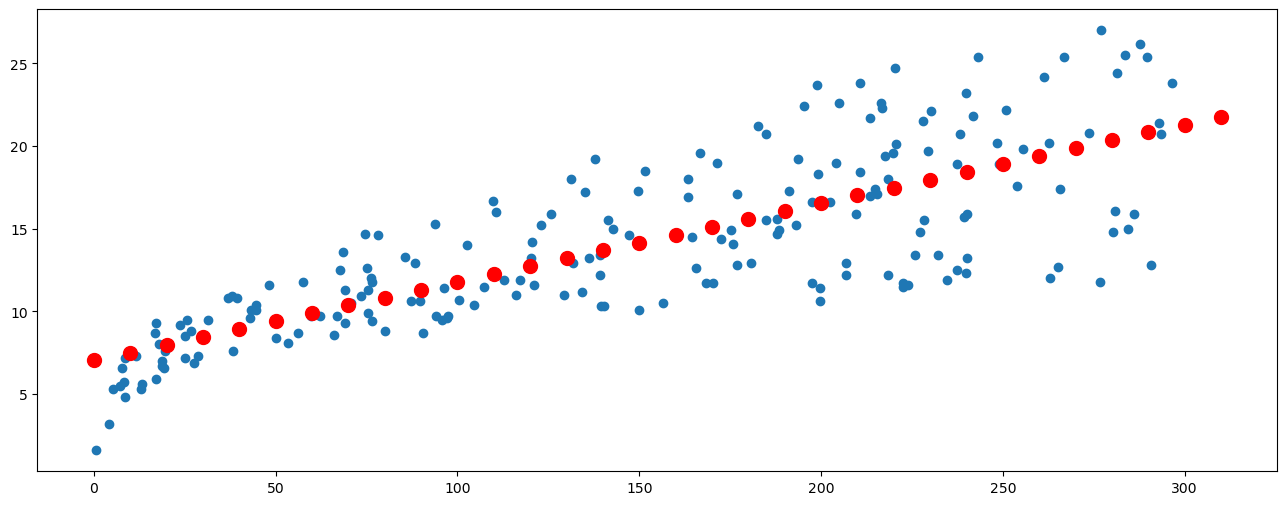

In [8]:
plt.figure(figsize=(16, 6))

x_axis = np.arange(0, 320, 10)
y_line = linreg.intercept + linreg.slope * x_axis

plt.scatter(advertising["TV"], advertising["sales"])
plt.scatter(x_axis, y_line, color='red', s=100);

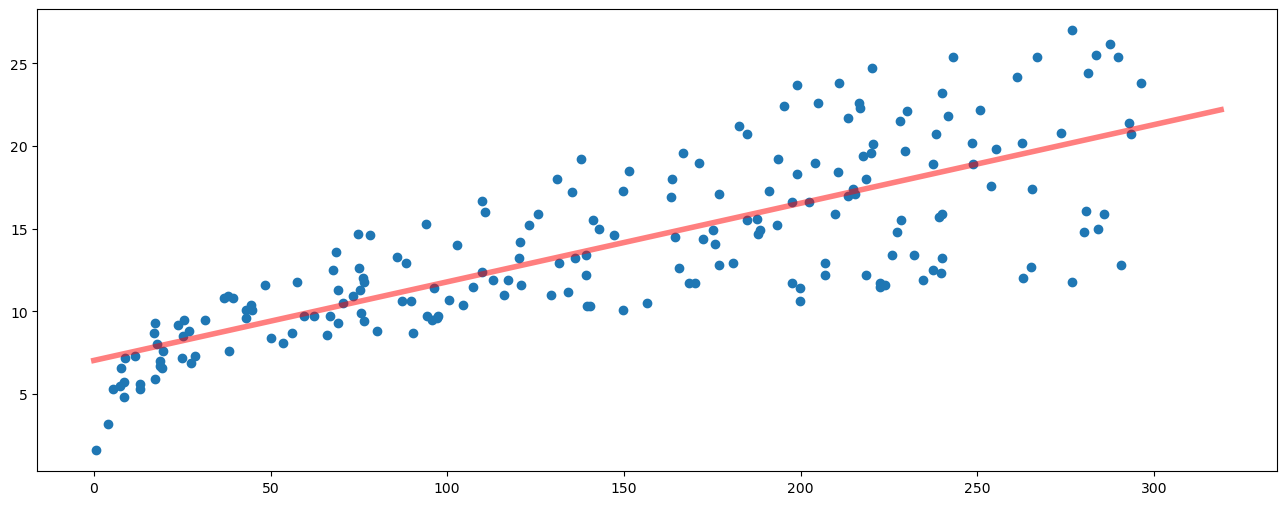

In [9]:
plt.figure(figsize=(16, 6))

x_axis = np.arange(0, 320)
y_line = linreg.intercept + linreg.slope * x_axis

plt.scatter(advertising["TV"], advertising["sales"])
plt.plot(x_axis, y_line, color='red', linewidth=4, alpha=0.5);

### The Quality of the Regression

```python
>>> linregress(advertising["TV"], advertising["sales"])

LinregressResult(slope=0.0475366404330197, intercept=7.032593549127702, rvalue=0.7822244248616063, pvalue=1.4673897001948012e-42, stderr=0.0026906071877968703, intercept_stderr=0.4578429402734785)
```

*  The correlation coefficient for the relationship between TV and sales is rather high
   * TV advertising budget explains $R^2 = 0.61$ of the variance in the product's sales


* Recall that the error is the differnece between the predicted value and the actual value

* If  $\hat{y}_i = \beta_0 + \beta_1 x_i$, then the error for $i^{th}$ data point is $e_i = \hat{y}_i - y_i$


In [10]:
some_point = advertising.iloc[0]
some_point

TV           230.1
radio         37.8
newspaper     69.2
sales         22.1
Name: 0, dtype: float64

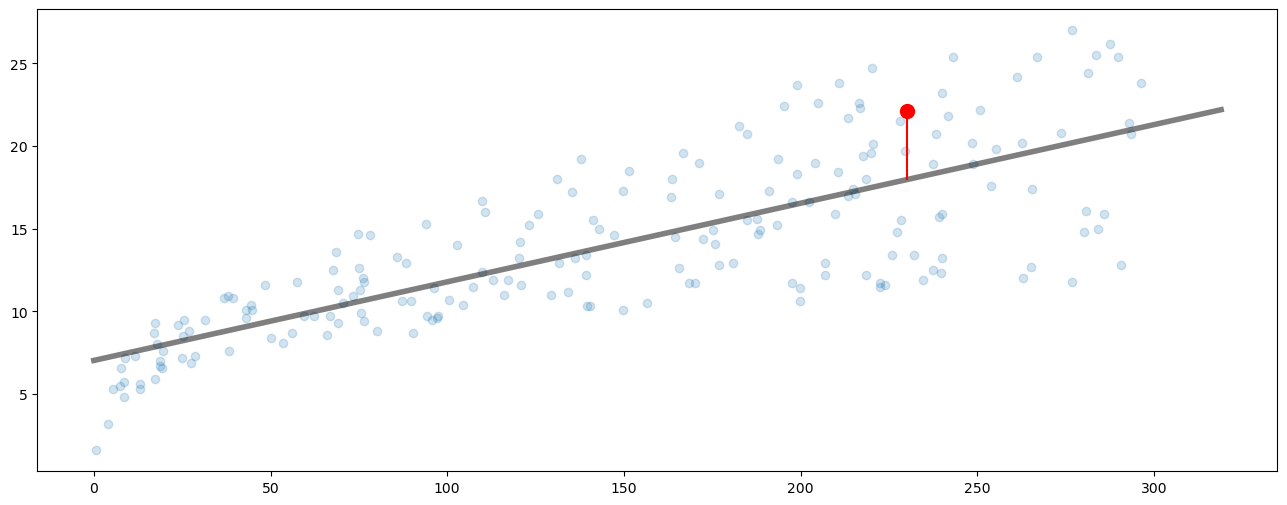

In [11]:
plt.figure(figsize=(16, 6))

x_axis = np.arange(0, 320)
y_line = linreg.intercept + linreg.slope * x_axis
plt.scatter(advertising["TV"], advertising["sales"], alpha=0.2)
plt.plot(x_axis, y_line, color='black', linewidth=4, alpha=0.5)

y_hat = linreg.intercept + linreg.slope * some_point["TV"]
plt.scatter(some_point["TV"], some_point["sales"], color='red', s=100)
plt.vlines(some_point["TV"], some_point["sales"], y_hat, color='red');

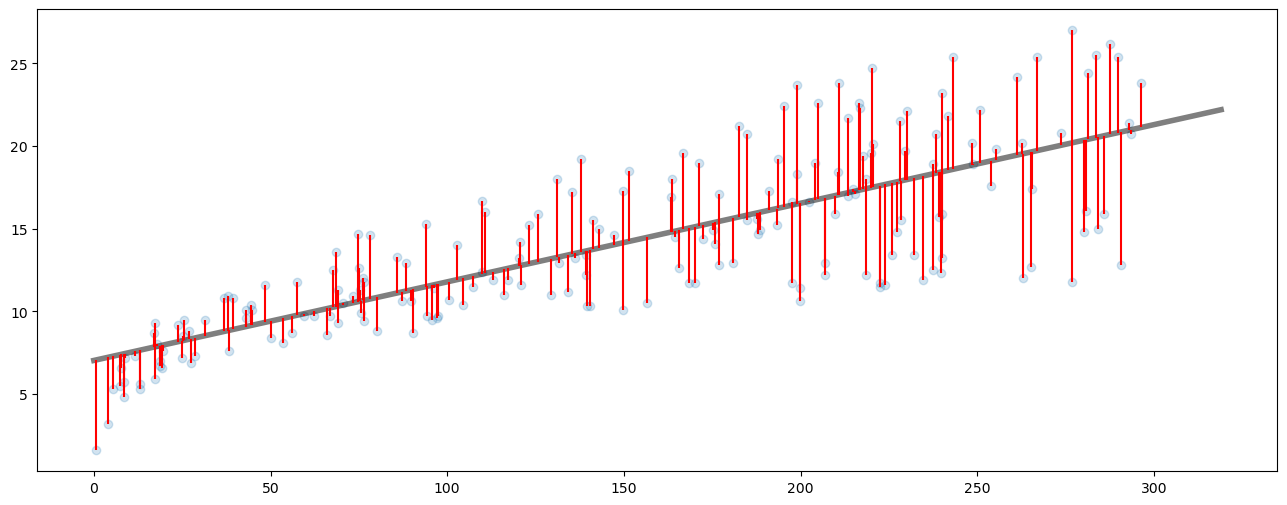

In [12]:
plt.figure(figsize=(16, 6))

x_axis = np.arange(0, 320)
y_line = linreg.intercept + linreg.slope * x_axis
plt.scatter(advertising["TV"], advertising["sales"], alpha=0.2)
plt.plot(x_axis, y_line, color='black', linewidth=4, alpha=0.5)

for i in range(advertising.shape[0]):
    y_hat = linreg.intercept + linreg.slope * advertising.iloc[i]["TV"]
#     plt.scatter(advertising.iloc[i]["TV"], advertising.iloc[i]["sales"], color='red', s=100)
    plt.vlines(advertising.iloc[i]["TV"], advertising.iloc[i]["sales"], y_hat, color='red')

### The Residual Sum of Squares

* We can quantify how well a line fits the data simply by assessing the total error 
* To avoid that error values cancel out, we compute the sum of square of the error
* We call that the residual sum of squares (RSS)

$$
RSS = e_1^2 + e_2^2 + \cdots + e_n^2
$$


### Regression Coefficients: Minimizing the RSS

* Naturally, we want the linear regression model that provides the smallest RSS

* The line with the smallest RSS is the best model under the current assumption
  * Model is linear


### Regression Coefficients : Minimizing the RSS -- Cont'd 

<center><img src="https://www.dropbox.com/scl/fi/o7hq1n743rff6i4viq3ao/RSS_Examples.png?rlkey=26zgonbkczp6x2tdf2c5xzwxt&dl=1" alt="drawing" style="width:1200px"/>


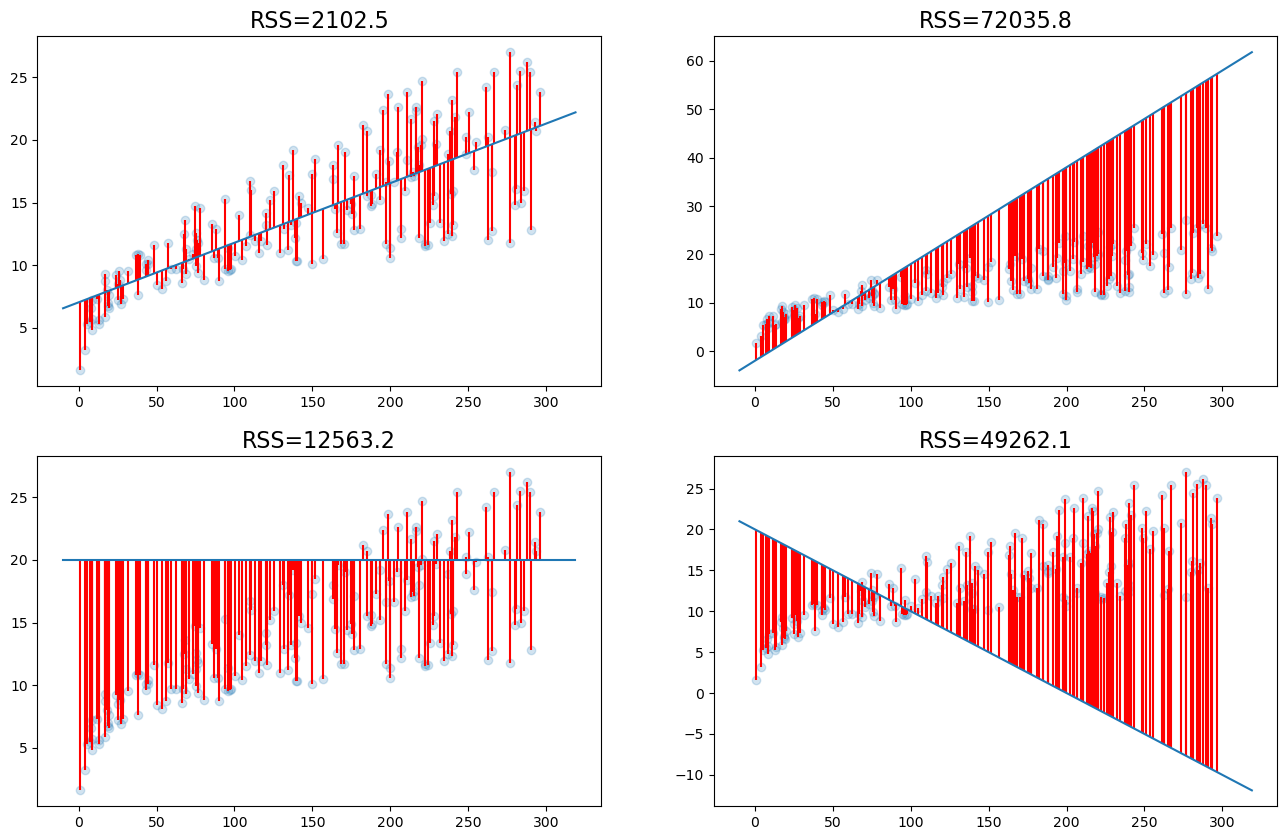

In [13]:
plt.figure(figsize=(16, 10))
x_axis = np.arange(-10, 320)

models = [(linreg.intercept, linreg.slope), (-2, 0.2), (20, 0), (20, -0.1)]

for (m, model) in enumerate(models):
    plt.subplot(2, 2, m+1)
    y_line = model[0] + model[1] * x_axis
    plt.scatter(advertising["TV"], advertising["sales"], alpha=0.2)
    RSS = 0 
    for i in range(advertising.shape[0]):
        y_hat = model[0] + model[1] * advertising.iloc[i]["TV"]
        plt.vlines(advertising.iloc[i]["TV"], advertising.iloc[i]["sales"], y_hat, color='red')    
        RSS += (y_hat - advertising.iloc[i]["sales"])**2
    plt.plot(x_axis, y_line)
    plt.title("RSS={}".format(round(RSS, 1)), fontsize=16)

<center><img src="https://www.dropbox.com/scl/fi/6r98givlv8jtc7b68libz/curve.png?rlkey=89r9wri2ldou0mjbqaucy85kq&dl=1" alt="drawing" style="width:1000px"/>

### Computing the RSS

* For linear regression, we can use calculus to arrive at the closed form solutions of $\beta_0$ and $\beta_1$ that minimize the RSS

* Minimize equation by finding where partial derivatives are equal to 0 

$
\hspace{2in} \beta_1 = \frac{\sum_{i=1}^{n} (x_i -\bar{x})(y_i -\bar{y})}{\sum_{i=1}^{n} (x_i -\bar{x})^2}
$

$
\hspace{2in} \beta_0 = \bar{y} - \beta_1\bar{x}
$

* For other ML models, we may resort to optimization algorithms to find the best parameters
  * E.g.: gradient descent, genetic algorithms, particle swarm optimization, etc.


### Question

* Our data are samples from a larger population and getting new data may lead to different parameter estimates
* How confident are we in our model estimates?
* How can we quantify our belief in our parameter estimates?


### Cofidence Interval of Model Parameters

* One way we have done this in the past is using bootstrap
  * Subsample with replacement the same number of points
  * Compute the linear regression using the bootstrap sample
  * Compute the 95% confidence interval of the model
    

In [14]:
print(advertising.shape)

(200, 4)


In [15]:
# bootstrapping the data (same sample size)
advertising.sample(advertising.shape[0], replace=True).head()

TV  radio  newspaper  sales
155    4.1   11.6        5.7    3.2
147  243.2   49.0       44.3   25.4
153  171.3   39.7       37.7   19.0
6     57.5   32.8       23.5   11.8
138   43.0   25.9       20.5    9.6

In [16]:
advertising.sample(advertising.shape[0], replace=True).head()

TV  radio  newspaper  sales
148   38.0   40.3       11.9   10.9
44    25.1   25.7       43.3    8.5
59   210.7   29.5        9.3   18.4
69   216.8   43.9       27.2   22.3
21   237.4    5.1       23.5   12.5

In [17]:
bootstrap_intercepts = []
bootstrap_slopes = []

for i in range(50_000):
    sample_indexes = np.random.choice(advertising.index, size=len(advertising.index))
    bootstrap_sample = advertising.iloc[sample_indexes]
    lr = linregress(bootstrap_sample["TV"], bootstrap_sample["sales"])    
    bootstrap_intercepts.append(round(lr.intercept, 3))
    bootstrap_slopes.append(round(lr.slope, 3))

print("10 first intercepts:")    
print(bootstrap_intercepts[:10])
print("10 first slopes:")    
print(bootstrap_slopes[:10])

10 first intercepts:
[6.821, 7.278, 7.789, 6.747, 6.766, 7.058, 7.704, 7.063, 7.081, 7.056]
10 first slopes:
[0.05, 0.045, 0.041, 0.049, 0.049, 0.049, 0.045, 0.048, 0.048, 0.047]


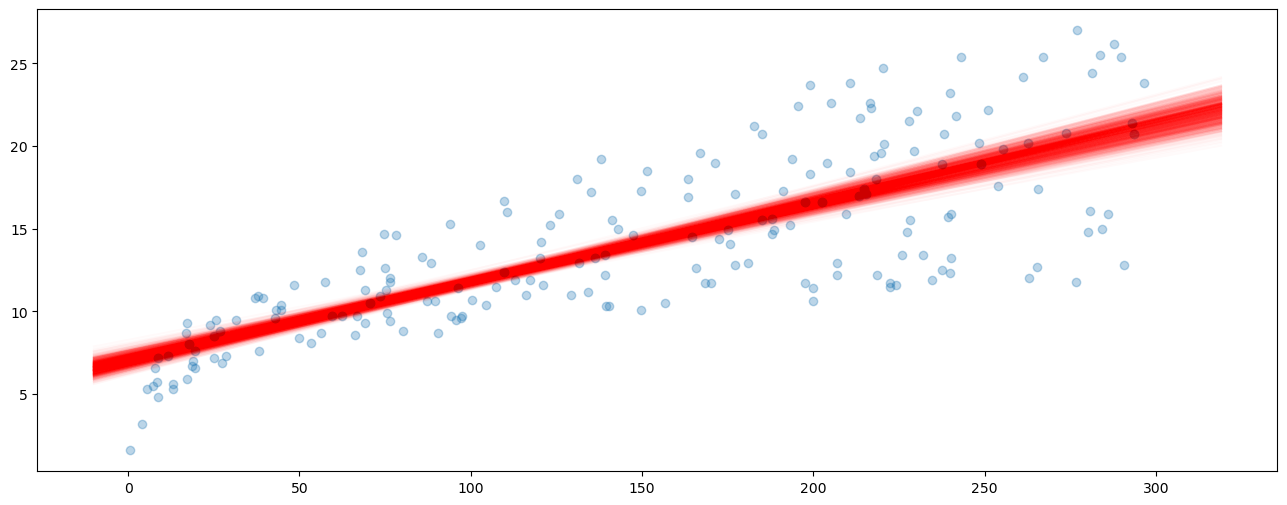

In [18]:
plt.figure(figsize=(16, 6))

plt.scatter(advertising["TV"], advertising["sales"], alpha=0.3)

x_axis = np.arange(-10, 320)

for i in np.random.choice(range(50000), 1000, replace=False):
    y_hat = bootstrap_intercepts[i] + bootstrap_slopes[i] * x_axis
    plt.plot(x_axis, y_hat, color='red', alpha=0.02)

[6.403 7.697]


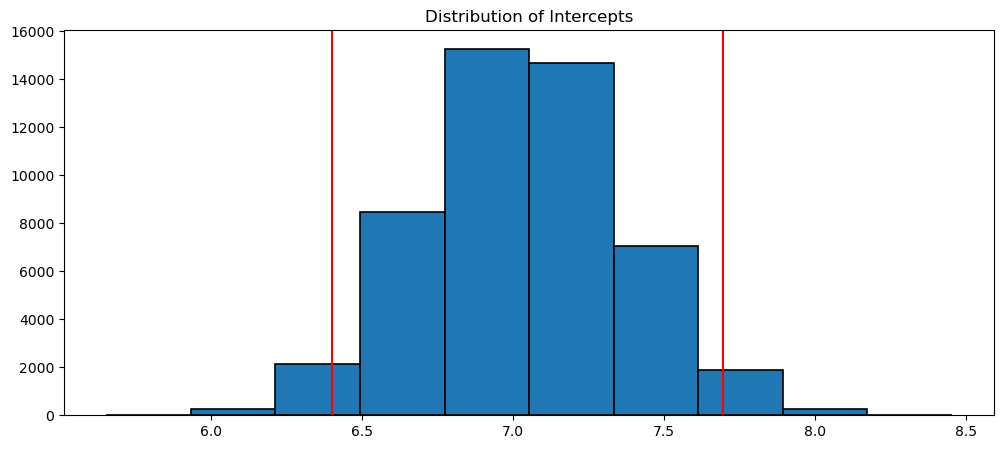

In [19]:
plt.figure(figsize=(12, 5))

plt.hist(bootstrap_intercepts, edgecolor='black', linewidth=1.2)
plt.title("Distribution of Intercepts")

conf_interval = np.percentile(bootstrap_intercepts, [2.5, 97.5])
print(conf_interval)

plt.axvline(conf_interval[0], color="red")
plt.axvline(conf_interval[1], color="red");

[0.042 0.053]


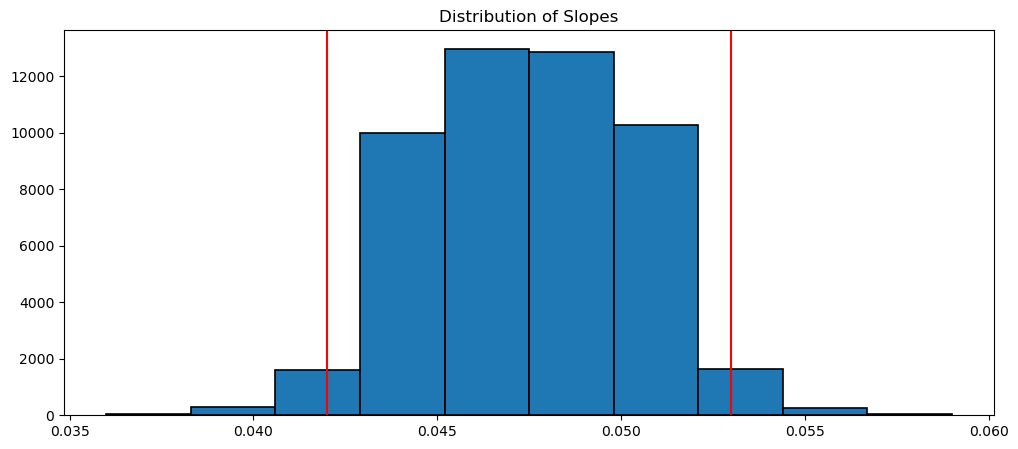

In [20]:
plt.figure(figsize=(12, 5))

plt.hist(bootstrap_slopes, edgecolor='black', linewidth=1.2)
plt.title("Distribution of Slopes")

conf_interval = np.percentile(bootstrap_slopes, [2.5, 97.5])
print(conf_interval)

plt.axvline(conf_interval[0], color="red")
plt.axvline(conf_interval[1], color="red");

### Stats Model

* This information can be found using the `Statsmodels` package
  * We use ordinary least squares model to build the regression model
  * Ordinary least squares (OLS) is a method for estimating the unknown parameters in a linear regression model
  
* Used the statistical language $R$'s notation to describe the model
  * Here "~" can be interpreted as "a function of" or "depends on"


In [21]:
linregress(advertising["TV"], advertising["sales"])

LinregressResult(slope=0.0475366404330197, intercept=7.032593549127702, rvalue=0.7822244248616063, pvalue=1.4673897001948012e-42, stderr=0.0026906071877968703, intercept_stderr=0.4578429402734785)

In [11]:
import statsmodels.formula.api as smf

est = smf.ols('sales ~ TV', advertising).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [12]:
est.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [13]:
# compute predicted values given the estimated model parameters

est.predict(advertising["TV"])

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

### Interpreting the Simple Linear Regression

$\beta_0 = 7.0326$

* The intercept is the expected mean value of $y$ when $x=0$
  * If we spend $0 TV advertising, then we should expect, on average,  sales of 7.03 thousand units  

* The intercept has no intrinsic meaning when $x$ never equals 0
    
$\beta_1 = 0.0475$

*  $\beta_1$ quantifies the association between that variable and the response
  * The **average** effect on the reponse ($y$) of a one unit increase in $x$
* Each $1,000 spent on TV advertising  is associated with an increase in sales of approximately 47.5 additional units

In [14]:
from statsmodels.stats.outliers_influence import summary_table

st, data, ss2 = summary_table(est, alpha=0.05)

In [15]:
st

<class 'statsmodels.iolib.table.SimpleTable'>

In [26]:
data.shape

(200, 12)

In [18]:
ss2

['Obs',
 'Dep Var\nPopulation',
 'Predicted\nValue',
 'Std Error\nMean Predict',
 'Mean ci\n95% low',
 'Mean ci\n95% upp',
 'Predict ci\n95% low',
 'Predict ci\n95% upp',
 'Residual',
 'Std Error\nResidual',
 'Student\nResidual',
 "Cook's\nD"]

In [16]:
data

array([[ 1.00000000e+00,  2.21000000e+01,  1.79707745e+01, ...,
         3.24280835e+00,  1.27334860e+00,  7.94343302e-03],
       [ 2.00000000e+00,  1.04000000e+01,  9.14797405e+00, ...,
         3.23876912e+00,  3.86574623e-01,  9.20433966e-04],
       [ 3.00000000e+00,  9.30000000e+00,  7.85022376e+00, ...,
         3.23167110e+00,  4.48615033e-01,  1.68755025e-03],
       ...,
       [ 1.98000000e+02,  1.28000000e+01,  1.54465789e+01, ...,
         3.24949998e+00, -8.14457276e-01,  1.87178343e-03],
       [ 1.99000000e+02,  2.55000000e+01,  2.05139848e+01, ...,
         3.22966682e+00,  1.54381721e+00,  2.14892006e-02],
       [ 2.00000000e+02,  1.34000000e+01,  1.80658478e+01, ...,
         3.24243302e+00, -1.43899589e+00,  1.03866058e-02]])

In [17]:
fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T

### Disambiguation of the Confidence Interval

* The 95% interval relates to the mean prediction $y$ for input $x$ 
  * I.e., the mean value for predictions of type $x$ will be in that confidence interval 
  * This is what we are after if we are interested in the average behavior
* This is not to be confused with the 95% prediction interval of $y$
  * I.e., we are 95% confident that the true prediction will be in that interval
  * These are the interval we are interested in if we are after extreme cases
  
 * See https://stats.stackexchange.com/questions/16493/difference-between-confidence-intervals-and-prediction-intervals
 and https://stackoverflow.com/questions/17559408/confidence-and-prediction-intervals-with-statsmodels

#### Confidence Interval (CI)

The **confidence interval** for a regression model's prediction relates to the estimated mean (or expected value) of the dependent variable ($y$) for a given value of the independent variable ($x$). 

* This interval provides a range within which we are confident (to a certain degree, typically 95%) that the true mean of $y$ falls, given a specific $x$. 

  - The interval gives us a range that, based on our model, likely includes the average outcome ($y$) for a specific input ($x$).
  - If we were to repeat our study multiple times, collecting new samples each time, and calculate a confidence interval for each sample, we would expect about 95% of those intervals to contain the true mean value of $y$ for the given $x$.
  - It's about the average behavior or the expected outcome. If your interest lies in understanding what the typical or average response ($y$) would be for a given condition ($x$), then you look at the confidence interval.



#### Prediction Interval (PI)

* The **prediction interval**, on the other hand, provides a range for individual observations ($y$) for a specific value of $x$, within which we expect to find the true value of a single observed response with a certain level of confidence (again, typically 95%).

  - This interval is wider than the confidence interval because it accounts not only for the uncertainty of the mean estimate but also for the natural variability (or noise) in the data.
  - When we say a 95% prediction interval, it means we are 95% confident that a new observation (a single actual outcome of $y$ for a given $x$) will fall within this range.
  - It's useful when you're interested in the potential variation of individual outcomes, including extreme cases, rather than the average outcome.


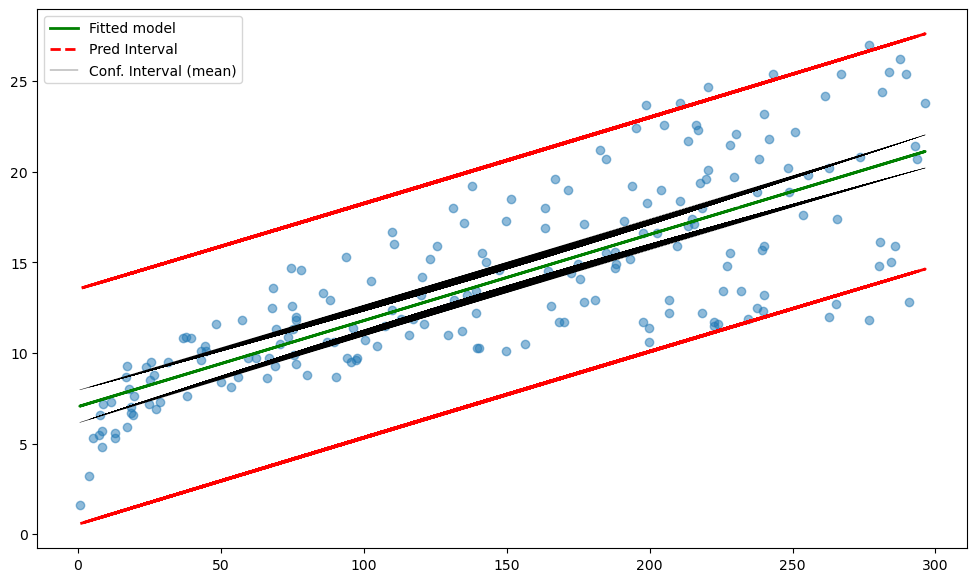

In [28]:
plt.figure(figsize=(12, 7))
plt.plot(advertising["TV"], advertising["sales"], 'o', alpha=0.5)
plt.plot(advertising["TV"], fittedvalues, 'g-', lw=2, label="Fitted model")
plt.plot(advertising["TV"], predict_ci_low, 'r--', lw=2, label="Pred Interval")
plt.plot(advertising["TV"], predict_ci_upp, 'r--', lw=2)
plt.plot(advertising["TV"], predict_mean_ci_low, 'k-', lw=0.3, label="Conf. Interval (mean)")
plt.plot(advertising["TV"], predict_mean_ci_upp, 'k-', lw=0.3)
plt.legend();

### Multiple Linear Regression

* How can we leverage other information to predict sales?
  * Naive solution: Build independent regresison and combine results
  
* Problems with the naive solution
  * Not completely clear how to combine the data
    * Min, mean, or median, etc.? Why?
    
  * Each feature ignores the effect of the other features
    * Does not account for interactions


In [29]:
est = smf.ols('sales ~ radio', advertising).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [30]:
est = smf.ols('sales ~ newspaper', advertising).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

### Multiple Linear Regression 

* We re-write our linear regression equation to account for all variables

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon
$$

$\hspace{0.6in}$where:

$\hspace{0.6in}$ * $p$ is the number of variables in the model
  
$\hspace{0.6in}$ * $\beta_i$ is the mean effect on $y$ for a unit increase in the predictor $x_i$, holding all 
$\hspace{0.8in}$the other values constant
  

* We can use statsmodels to compute the parameters of the new model:

$$
sales = \beta_0 + \beta_1 \times \text{TV\_budget} + \beta_2 \times \text{radio\_budget} + \beta_3 \times \text{newspaper\_budget} + \epsilon
$$


### Estimating the Regression Coefficients

<img src="https://www.dropbox.com/scl/fi/cornqx9fo5doodbjl3nbk/plane.png?rlkey=t2xytc7f0xhcqzl07z60bcuvu&dl=1">

In [31]:
advertising.corr()

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

In [32]:
est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.58e-96
Time:                        19:12:20   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

### Model Interpretation

<center><img src="https://www.dropbox.com/s/btz9dqkzdxkz5qy/results_table.png?dl=1" width=400></center>

* For each additional $1K in TV advertising, we expect, on average, an increase in sales of 45.8 units

* For each additional $1K in radio advertising, we expect, on average, an increase in sales of 188.5 units

* The newspaper spending is not significant and does not contribute to the model
  * Why is it different from when tested independently?


### Interaction

* Simple linear regression predicts an effect of 0.0547 (54.7 units) for newspaper
* Multiple linear regression predicts an effect of ~0

* Recall that the  correlation between radio and newspaper is ~0.35
    * Positive correlation indicates that in some cases, spending on radio advertising is accompanied by spending on newspaper advertising

* What is happening?
* radio advertising leads to increased sales

* radio and newspaper are correlated
  * radio advertising is accompanied by newspaper advertising

* Part of the effect of newspaper advertising is actually accounted for by radio advertising


### Some Important Concepts to Explore

* In the presence of dozens of predictors, the situation above becomes intractable manually
  * Which parameters are linked with which other parameters?
  * While the $R^2$ will increase as the number of predictors increases, this is not indicative that the model is getting better
    * Often referred to as overfitting
    
* Identifying the best subset among many variables to include in a model is challenging
  * This is discussed in depth in chapters 3 and of (Introduction to Statistical Learning -- excellent book if you'd like to delve deeper into this)

* Some advanced models will automatically "shrink" the contribution of a feature to a model
  * E.g.: ridge regression or lasso regression, shrink the contributions of "unnecessary" features.
